In [192]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [193]:
europe = [
    "Albania", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria",
    "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", 
    "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", 
    "Latvia", "Lithuania", "Luxembourg", "Malta", "Moldova", "Montenegro", 
    "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", 
    "Russia", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", 
    "Ukraine", "United Kingdom"
]

africa = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", 
    "Cape Verde", "Cameroon", "Central African Republic", "Chad", "Comoros", 
    "Congo", "Democratic Republic of Congo", "Djibouti", "Egypt", "Eswatini", 
    "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", 
    "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", 
    "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", 
    "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", 
    "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", 
    "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", 
    "Zambia", "Zimbabwe"
]

asia = [
    "Armenia", "Azerbaijan", "Bangladesh", "Bhutan", "Brunei", "Cambodia", 
    "China", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", 
    "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", 
    "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", 
    "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", 
    "Singapore", "South Korea", "Sri Lanka", "Syria", "Tajikistan", "Thailand", 
    "Timor", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", 
    "Vietnam", "Yemen"
]

north_america = [
    "Belize", "Canada", "Costa Rica", "Dominican Republic", "El Salvador", 
    "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", 
    "Panama", "Trinidad and Tobago", "United States"
]

south_america = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", 
    "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"
]

oceania = [
    "Australia", "Fiji", "Kiribati", "Micronesia (country)", "Nauru", 
    "New Zealand", "Papua New Guinea", "Samoa", "Solomon Islands", 
    "Tonga", "Tuvalu", "Vanuatu"
]

continents = [europe, africa, asia, north_america, south_america, oceania]
continent_names = ["Europe", "Africa", "Asia", "North America", "South America", "Oceania"]

In [194]:
# Load data and rename columns

data = pd.read_csv("../data/poverty-share-on-less-than-30-per-day.csv")
data.columns = ["Entity", "Code", "Year", "Percentage"]

data.head()

,Entity,Code,Year,Percentage
0,Albania,ALB,1981,99.91247
1,Albania,ALB,1982,99.91247
2,Albania,ALB,1983,99.91247
3,Albania,ALB,1984,99.91247
4,Albania,ALB,1985,99.91247


In [195]:
# Create bins and group data
df = data

bins = list(range(0, 110, 20))
bin_labels = [f"{bins[0]}-{bins[1]}"] + [f"{bins[i] + 1}-{bins[i + 1]}" for i in range(1, len(bins) - 1)]

data["Bin"] = pd.cut(data["Percentage"], bins=bins, labels=bin_labels, right=True)
#binned_df = data.groupby(["Year", "Bin"]).size().unstack(fill_value=0)

total_counts = df.groupby("Year").size()
binned_df = df.groupby(["Year", "Bin"]).size().unstack(fill_value=0).div(total_counts, axis=0) * 100

binned_df.head()

C:\Users\Aleksi\AppData\Local\Temp\ipykernel_10464\2951602877.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_df = df.groupby(["Year", "Bin"]).size().unstack(fill_value=0).div(total_counts, axis=0) * 100


Bin,0-20,21-40,41-60,61-80,81-100
Year,,,,,
1981,0.584795,1.754386,5.847953,5.263158,85.964912
1982,0.584795,1.754386,5.847953,5.263158,85.964912
1983,1.169591,1.754386,5.263158,5.263158,86.549708
1984,1.169591,2.339181,5.263158,4.678363,86.549708
1985,1.156069,2.312139,6.358382,3.468208,86.705202


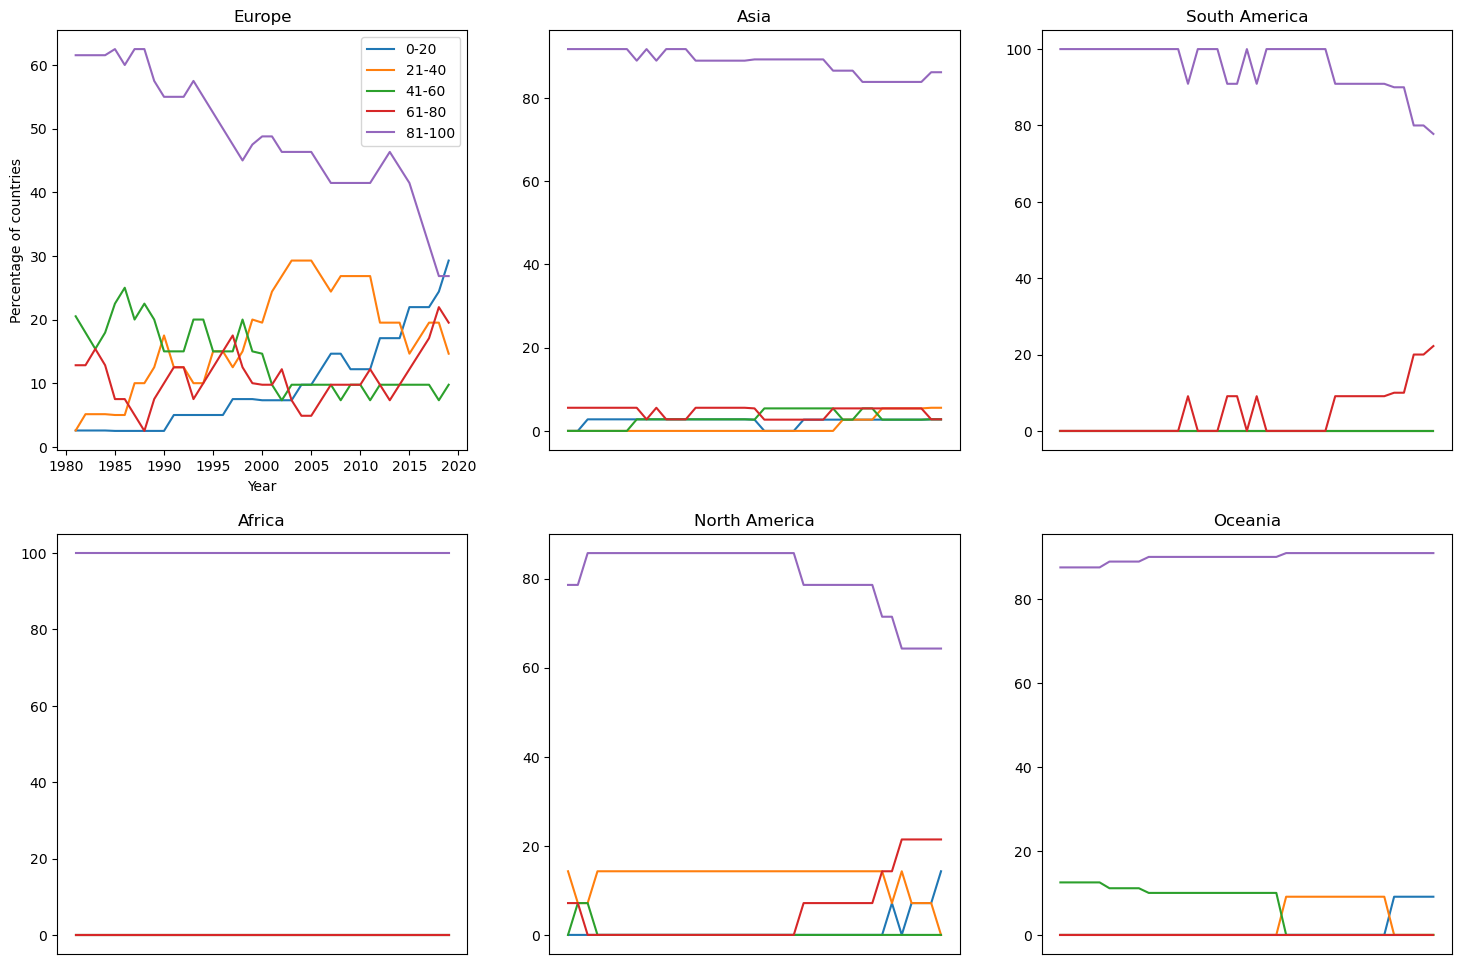

In [207]:
fig, axs = plt.subplots(2, len(continents) // 2, figsize=(18, 12))
for i, countries in enumerate(continents):
    df = data
    df = data[data.Entity.isin(countries)]

    data["Bin"] = pd.cut(data["Percentage"], bins=bins, labels=bin_labels, right=True)

    total_counts = df.groupby("Year").size()
    binned_df = (
        df.groupby(["Year", "Bin"], observed=False)
        .size()
        .unstack(fill_value=0)
        .div(total_counts, axis=0)
        * 100
    )

    for b in bin_labels:
        col = binned_df[b]
        axs[i % 2, i // 2].plot(col.index, col.values, label=b)

    axs[i % 2, i // 2].set_title(continent_names[i])
    if i != 0:
        axs[i % 2, i // 2].tick_params(
            axis="x",  # changes apply to the x-axis
            which="both",  # both major and minor ticks are affected
            bottom=False,  # ticks along the bottom edge are off
            top=False,  # ticks along the top edge are off
            labelbottom=False,
        )
        


axs[0, 0].set(xlabel="Year")
axs[0, 0].set(ylabel="Percentage of countries")
axs[0, 0].legend()

#plt.savefig("plot.png")
plt.show()

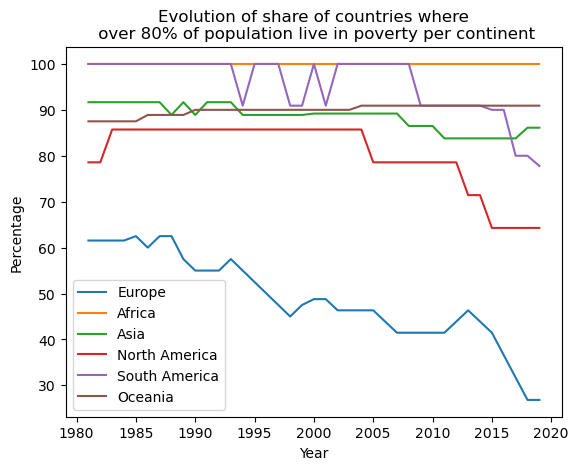

In [ ]:
b = "81-100"
for i, countries in enumerate(continents):
    df = data
    df = data[data.Entity.isin(countries)]

    data["Bin"] = pd.cut(data["Percentage"], bins=bins, labels=bin_labels, right=True)

    total_counts = df.groupby("Year").size()
    binned_df = (
        df.groupby(["Year", "Bin"], observed=False)
        .size()
        .unstack(fill_value=0)
        .div(total_counts, axis=0)
        * 100
    )
    
    col = binned_df[b]
    plt.plot(col.index, col.values, label=continent_names[i])

    axs[i % 2, i // 2].set_title(continent_names[i])
    if i != 0:
        axs[i % 2, i // 2].tick_params(
            axis="x",  # changes apply to the x-axis
            which="both",  # both major and minor ticks are affected
            bottom=False,  # ticks along the bottom edge are off
            top=False,  # ticks along the top edge are off
            labelbottom=False,
        )
        


plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend()
plt.title("Evolution of share of countries where\n over 80% of population live in poverty per continent")

#plt.savefig("plot.png")
plt.show()